# Drawing Operations

---

## Standard Imports

In [9]:
import cv2
import numpy as np
from tutorial_utils.utils import *
from matplotlib import pyplot as plt
DATA_DIR = data_dir()

---

### Creating a Blank Image

An image is a `numpy` array of size (rows=HEIGHT, columns=WIDTH, CHANNELS)

* The `dtype` is `np.uint8`, or 8-bit color

* This means that the intensity of each channel takes a value between 0-255

* 0 = no intensity (black)

* 255 = max intensity (white)

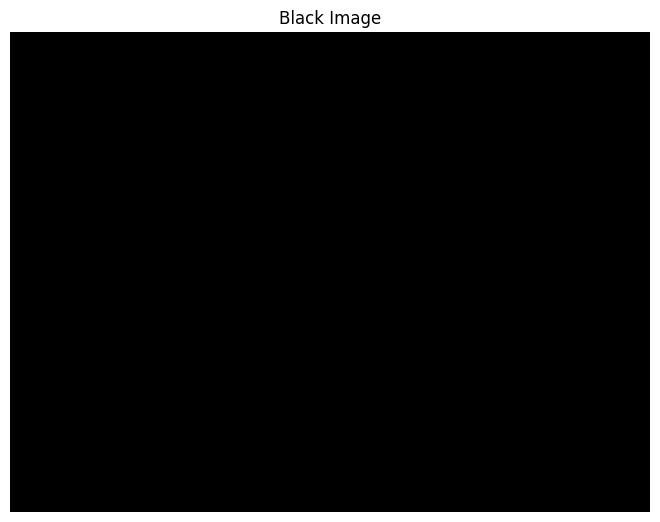

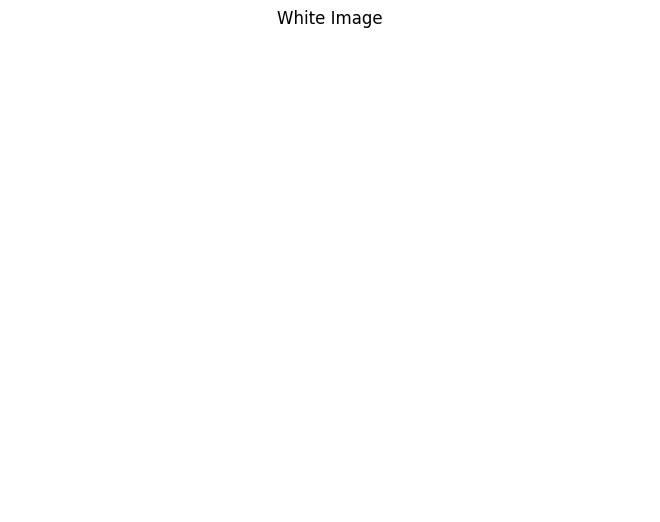

In [10]:
HEIGHT, WIDTH = 480, 640
CHANNELS = 3


# Create a blank black image
black_img = np.zeros((HEIGHT, WIDTH, CHANNELS), dtype=np.uint8)

# Create a blank white image
white_img = np.ones((HEIGHT, WIDTH, CHANNELS), dtype=np.uint8) * 255

# Display both images
cv2_imshow(black_img, 'Black Image')

cv2_imshow(white_img, 'White Image')

---

### Drawing Lines

`cv2.line()` is used to draw lines. It takes the following arguments:
* Image
* pt1 : The first point, expressed in (x,y) coordinates, not (row, col)
* pt2 : The second point, expressed in (x,y) coordinates
* color : A tuple of B,G,R intensities
* thickness : in pixels

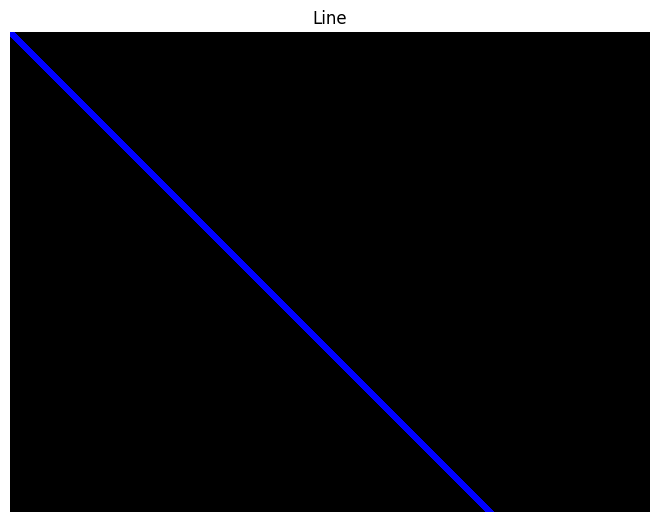

In [12]:
HEIGHT, WIDTH = 480, 640
CHANNELS = 3
COLOR_BLUE = (255, 0, 0)

img = np.zeros((HEIGHT, WIDTH, CHANNELS), np.uint8)

cv2.line(img, pt1=(0,0), pt2=(511, 511), color=COLOR_BLUE, thickness=5)

cv2_imshow(img, 'Line')

---

### Drawing a Rectangle

`cv2.rectangle()` is used to draw a rectangle. It takes the following arguments:
* Image
* pt1 : Top Left Corner, expressed in (x,y) coordinates, NOT (row, column)
* pt2 = Bottom Right Corner, expressed in (x,y) coordinates
* color : A tuple of B,G,R intensities
* thickness : Line thickness in pixels. If it is -1, it draws a filled rectangle

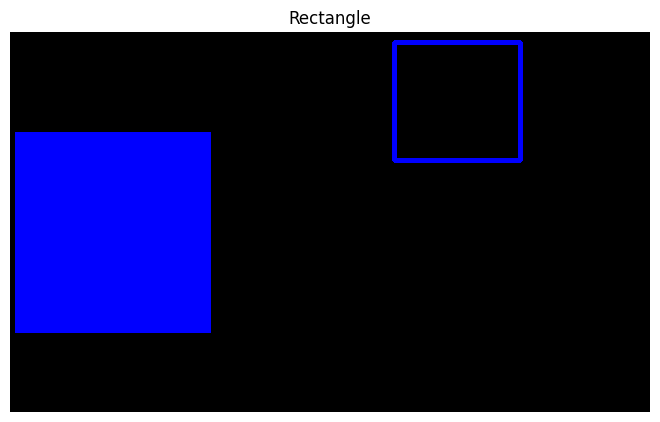

In [32]:
HEIGHT, WIDTH = 380, 640
CHANNELS = 3
COLOR_BLUE = (255, 0, 0)

img = np.zeros((HEIGHT, WIDTH, CHANNELS), np.uint8)

# Draw a rectangle with thick border
cv2.rectangle(img, pt1=(384,10), pt2=(510, 128), color=COLOR_BLUE, thickness=3)

# Draw a filled rectangle
cv2.rectangle(img, pt1=(5, 100), pt2=(200, 300), color=COLOR_BLUE, thickness=-1)

cv2_imshow(img, 'Rectangle')

---

### Drawing a Circle

`cv2.circle()` is used to draw a circle. It takes the following arguments:
* Image
* center : The center of the circle, expressed in (x,y) coordinates, NOT (row, column)
* radius : An integer, pixels
* color : A tuple of B,G,R intensities
* thickness : Line thickness in pixels. If it is -1, draws a filled circle

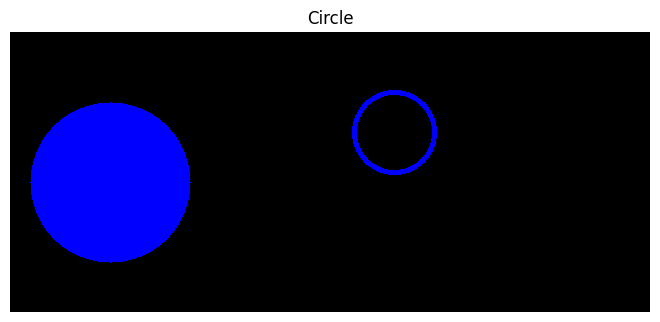

In [31]:
HEIGHT, WIDTH = 280, 640
CHANNELS = 3
COLOR_BLUE = (255, 0, 0)

img = np.zeros((HEIGHT, WIDTH, CHANNELS), np.uint8)

# Draw a circle with thick border
cv2.circle(img, center=(384,100), radius=40, color=COLOR_BLUE, thickness=3)

# Draw a filled circle
cv2.circle(img, center=(100, 150), radius=80, color=COLOR_BLUE, thickness=-1)

cv2_imshow(img, 'Circle')

---

### Drawing an Ellipse

`cv2.ellipse()` is used to draw an ellipse. It takes the following arguments:
* Image
* center : The center of the ellipse, expressed in (x,y) coordinates, NOT (row, column)
* axes : A tuple representing lengths of Major and Minor axes in pixels
* angle : Angle of rotation of major axis of ellipse in CCW direction about its center point, in degrees
* startAngle & endAngle : Starting and Ending angle of ellipse arc, measured in CW direction, from the major axis, about the ellipse center. startAngle = 0 and endAngle=360 means draw the full ellipse
* color : A tuple of B,G,R intensities
* thickness : Line thickness in pixels. If it is -1, draws a filled ellipse

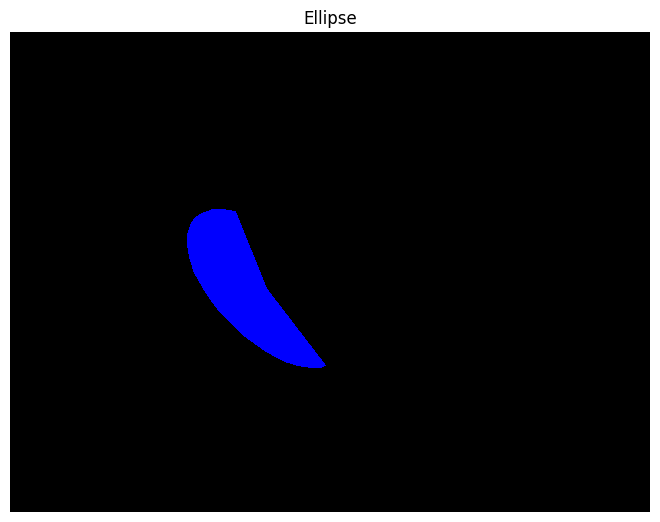

In [23]:
HEIGHT, WIDTH = 480, 640
CHANNELS = 3
COLOR_BLUE = (255, 0, 0)

img = np.zeros((HEIGHT, WIDTH, CHANNELS), np.uint8)

MAJOR_AXIS = 100 # pixels
MINOR_AXIS = 50 # pixels

# Draw a filled partial ellipse rotated by 45 degrees
cv2.ellipse(img, center=(256, 256), axes=(MAJOR_AXIS, MINOR_AXIS), angle=45, startAngle=15, endAngle=220, color=COLOR_BLUE, thickness=-1)

cv2_imshow(img, 'Ellipse')

---

### Drawing a Polygon or Polyline

`cv2.polylines()` can be used to draw either polylines or polygons. It takes the following arguments:
* Image
* A list of array of vertices
    * Each vertex is represented as (x,y) coordinates, NOT (row, column)
    * The dtype of the array must be some kind of integer
    * The array of vertices must be reshaped to ROWS x 1 x 2 where ROWS means the number of vertices
    * We can have multiple arrays of vertices; they will be plotted as separate objects
* isClosed : A boolean. If True, a line is drawn connecting the last vertex to the first to 'close' the polygon. Otherwise the list of vertices is treated as a polyline.
* color : A tuple of B,G,R intensity values
* thickness : Line thickness in pixels. Must be > 0. You cannot draw a filled polygon with this function

You can use `cv2.fillPoly()` to fill a polygon. It takes the following arguments:
* Image
* A list of array of vertices, same as above
* color : A tuple of B,G,R intensity values

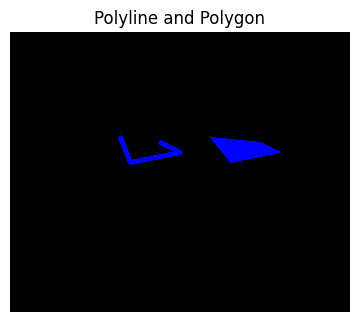

In [35]:
HEIGHT, WIDTH = 280, 340
CHANNELS = 3
COLOR_BLUE = (255, 0, 0)

img = np.zeros((HEIGHT, WIDTH, CHANNELS), np.uint8)

v1 = np.array([
    [110,105],
    [120,130],
    [170,120],
    [150,110]
], dtype=np.int32)

v2 = np.array([
    [200,105],
    [220,130],
    [270,120],
    [250,110]
], dtype=np.int32)


# Using -1 inside reshape means we infer that particular dimension
# Only one dimension can be inferred
v1 = v1.reshape((-1, 1, 2))
v2 = v2.reshape((-1, 1, 2))

# Draw a polyline
cv2.polylines(img, [v1], isClosed=False, color=COLOR_BLUE, thickness=3)

# Draw a filled polygon
cv2.fillPoly(img, [v2], color=COLOR_BLUE)

cv2_imshow(img, 'Polyline and Polygon')

---

### Adding Text to Images

`cv2.putText()` is used to generate text. It has the following arguments:
* Image
* text : A string containing the text to be displayed
* org : The origin of the text. This is the bottom-left coordinate of the text
* fontFace : a `cv2` font type
* fontScale : Size of the font, float.
* color : A tuple of B,G,R intensities
* thickness : Line thickness for the font
* lineType : Line type for the font


To position the text properly, you can obtain the text size using `cv2.getTextSize()`. This takes the arguments:
* text
* fontFace
* fontScale
* thickness

This function calculates and returns the size of a box that contains the specified text.
It also returns `baseline`, the y-coordinate of the imaginary line upon which most characters in a line of text sit. If `getTextSize()` returns (`width, height`) and `baseline`, the total height required to render the text is `height + b`. This is because some portions of letters like `g` descend below the baseline. 

The available fonts are as follows:
```
0   cv2.FONT_HERSHEY_SIMPLEX
1   cv2.FONT_HERSHEY_PLAIN
2   cv2.FONT_HERSHEY_DUPLEX
3   cv2.FONT_HERSHEY_COMPLEX
4   cv2.FONT_HERSHEY_TRIPLEX
5   cv2.FONT_HERSHEY_COMPLEX_SMALL
6   cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
7   cv2.FONT_HERSHEY_SCRIPT_COMPLEX
16 : Add 16 to any of the other font numbers to make them italicised
```

**Pixel Connectivity Trivia**
 
In order to draw a line, we need to figure out which pixels to color. Line-Drawing algorithms usually iterate over the x-coordinate in one-pixel increments, find the corresponding y-coordinate from the equation of the line, and try to find the pixel in which that point (x,y) falls. However, we only color that pixel if it is 'connected' to another neighboring pixel.

Depending on how we define this 'connectivity', sometimes diagonal/angled lines may have gaps in them. 4-connectivity means we only check the neighbors immediately up,down,left and right of the pixel. 8-connectivity means we check the 4 direct neighbors as well as the 4 diagonal neigbors. As a result, 8-connectivity leads to better, smoother looking lines than 4-connectivity.

The `lineType` argument is used to determine the **pixel connectivity** used to draw the line. The available `lineType`s are as follows:
```
cv2.LINE_4 : 4-connected line. Results in blockier looking lines especially on diagonals. Rarely used in modern applications.

cv2.LINE_8 : 8-connected line. Produces better quality lines than LINE_4 but diagonal or curved lines still have a visible 'staircase' effect.

cv2.LINE_AA : Anti-aliased line (smoothing via Gaussian Filter). Preffered option for quality output.

cv2.FILLED : Not a line type. It is used in place of writing thickness=-1, i.e. to fill the shape instead of just drawing an outline

```

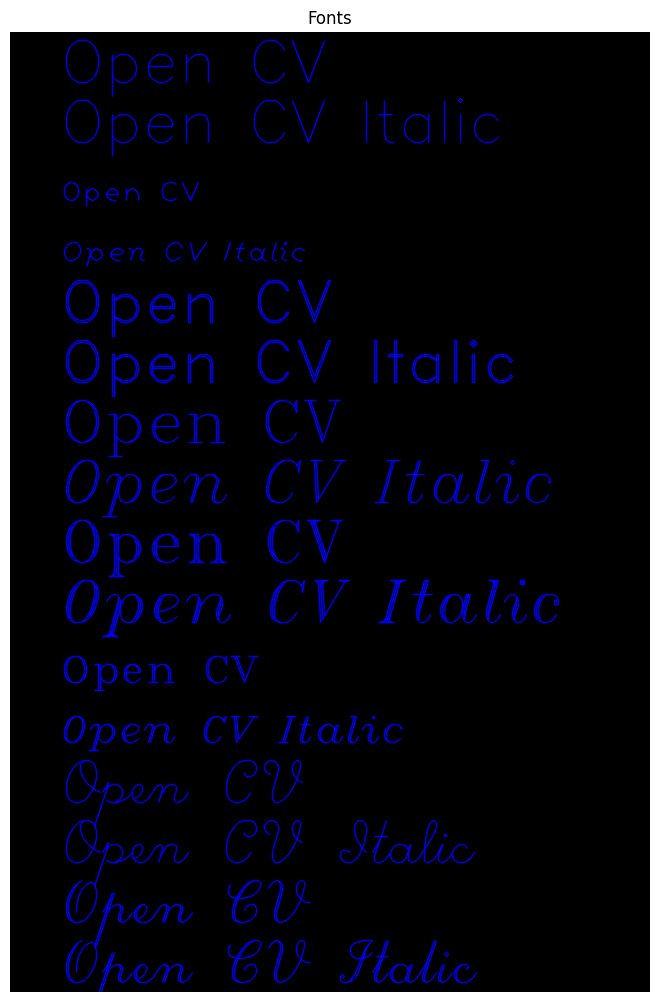

In [54]:
HEIGHT, WIDTH = 960, 640
CHANNELS = 3
COLOR_BLUE = (255, 0, 0)

img = np.zeros((HEIGHT, WIDTH, CHANNELS), np.uint8)

fonts = [
    cv2.FONT_HERSHEY_SIMPLEX,
    cv2.FONT_HERSHEY_PLAIN,
    cv2.FONT_HERSHEY_DUPLEX,
    cv2.FONT_HERSHEY_COMPLEX,
    cv2.FONT_HERSHEY_TRIPLEX,
    cv2.FONT_HERSHEY_COMPLEX_SMALL,
    cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
    cv2.FONT_HERSHEY_SCRIPT_COMPLEX,   
]

text = "Open CV"
text_italic = "Open CV Italic"

for i in range(len(fonts)):
    y_coord = 50 + 120*i
    x_coord = 50

    # Write normal text
    cv2.putText(img, text, (x_coord, y_coord), fonts[i], 2, COLOR_BLUE, thickness=1, lineType=cv2.LINE_AA)
    
    # Write italicised text
    cv2.putText(img, text_italic, (x_coord, y_coord + 60), fonts[i] + 16, 2, COLOR_BLUE, thickness=1, lineType=cv2.LINE_AA)


cv2_imshow(img, "Fonts")

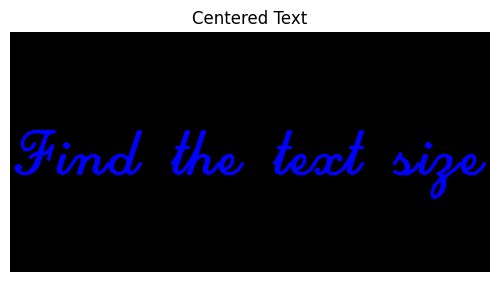

In [56]:
HEIGHT, WIDTH = 240, 480
CHANNELS = 3
COLOR_BLUE = (255, 0, 0)

img = np.zeros((HEIGHT, WIDTH, CHANNELS), np.uint8)

# Get the size of text
text = "Find the text size"
font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
font_scale = 2
thickness = 2

(text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)

# Calculate the position to center the text
textX = (img.shape[1] - text_width) // 2
textY = (img.shape[0] + text_height) // 2

# Draw the text
cv2.putText(img, text, (textX, textY), font, font_scale, COLOR_BLUE, thickness, cv2.LINE_AA)

cv2_imshow(img, "Centered Text")


---

### Drawing Arrows

`cv2.arrowedLine()` can be used to draw arrows. It takes the following arguments:
* Image
* Start Point in (x,y) coordinates, NOT (row, column)
* End Point in (x,y) coordinates
* color : A tuple of B,G,R intensities
* thickness in pixels
* line type
* shift : Number of fractional bits in the point coordinates.
    * The input integer coordinates (x,y) are interpreted as real-world floating-point coordinates
    * Real Coordinate = Integer Coordinate *$2^{-shift}$
    * The default value is 0
* tipLength : length of arrow's tip in relation to the arrow's length

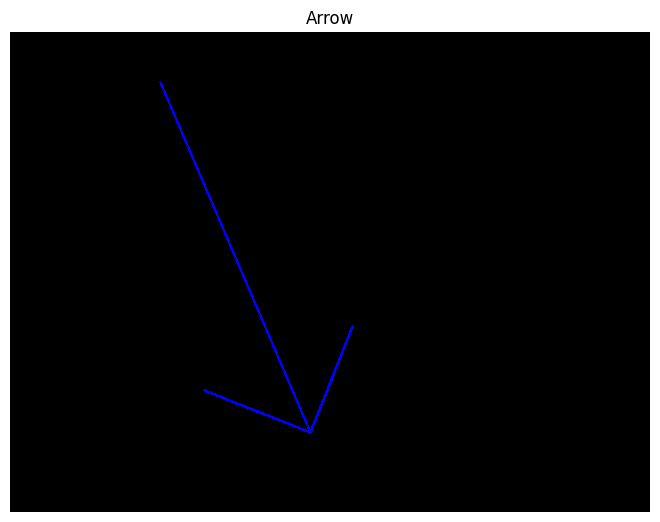

In [60]:
HEIGHT, WIDTH = 480, 640
CHANNELS = 3
COLOR_BLUE = (255, 0, 0)

img = np.zeros((HEIGHT, WIDTH, CHANNELS), np.uint8)

cv2.arrowedLine(img, (150, 50), (300, 400), COLOR_BLUE, thickness=2, tipLength=0.3)

cv2_imshow(img, "Arrow")

---

### Drawing Markers

`cv2.drawMarker()` can be used to draw markers for annotation. It takes the following arguments:
* Image
* position in (x,y) coordinates, NOT (row, column)
* marker type
* marker size
* color : A tuple of B,G,R intensities
* thickness
* line type

The following marker types are available:
```
cv2.MARKER_CROSS
cv2.MARKER_TILTED_CROSS
cv2.MARKER_STAR
cv2.MARKER_DIAMOND
cv2.MARKER_SQUARE
cv2.MARKER_TRIANGLE_UP
cv2.MARKER_TRIANGLE_DOWN
```

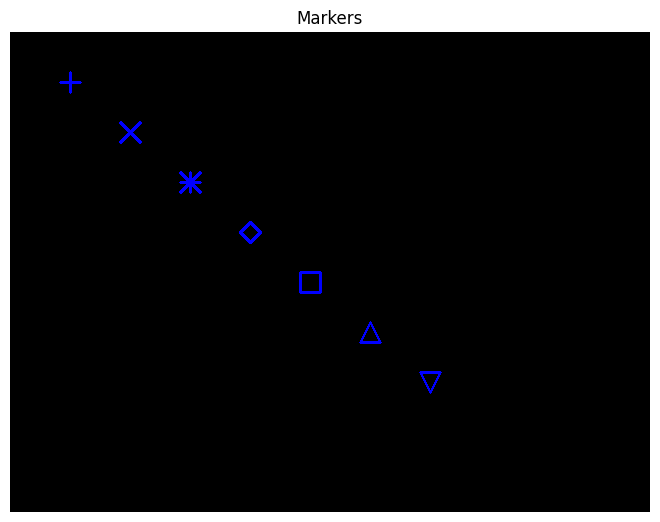

In [67]:
HEIGHT, WIDTH = 480, 640
CHANNELS = 3
COLOR_BLUE = (255, 0, 0)

img = np.zeros((HEIGHT, WIDTH, CHANNELS), np.uint8)

markers = [
    cv2.MARKER_CROSS,
    cv2.MARKER_TILTED_CROSS,
    cv2.MARKER_STAR,
    cv2.MARKER_DIAMOND,
    cv2.MARKER_SQUARE,
    cv2.MARKER_TRIANGLE_UP,
    cv2.MARKER_TRIANGLE_DOWN
]

for i in range(len(markers)):
    mtype = markers[i]

    cv2.drawMarker(img, (60 * (i+1), 50 * (i+1)), color=COLOR_BLUE, markerType=mtype, markerSize=20, thickness=2) 


cv2_imshow(img, "Markers")